## Preparación del modelo:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

dataset = pd.read_csv("diabetes.csv")
dataset.info()

X = dataset.drop(columns='Outcome')
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# initialize and fit model on the training set
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# predict category for the test inputs
y_test_predictions = model.predict(X_test)

print(y_test_predictions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 

[[119  29]
 [ 33  50]]
119 29 33 50


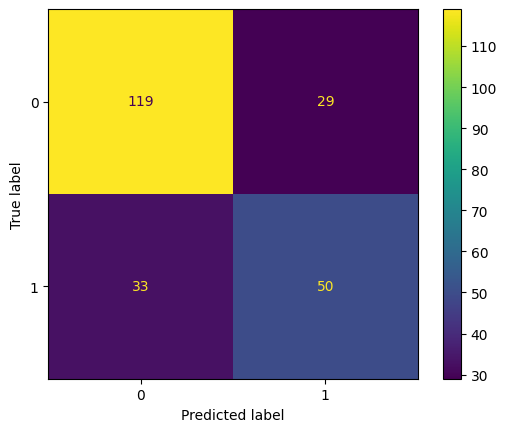

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_predictions)
print(cm)

true_neg, false_pos, false_neg, true_pos = cm.ravel()
print(true_neg, false_pos, false_neg, true_pos)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [3]:
from sklearn.metrics import accuracy_score

accuracy = round(accuracy_score(y_test, y_test_predictions), 2)
print(accuracy)

accuracy = (true_neg + true_pos) / (true_neg + false_pos + false_neg + true_pos)
accuracy = round(accuracy, 2)
print(accuracy)

0.73
0.73


In [6]:
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)

print("The precision is: ", precision)
print("The recall is: ", recall)

The precision is:  0.6329113924050633
The recall is:  0.6024096385542169
